##Importing Libraries

In [ ]:
pip install nltk networkx matplotlib;

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import networkx as nx



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##Importing the text file

In [ ]:
file_path = "/content/DRL.txt"
with open(file_path, "r") as file:
    data = file.readlines()

##Extracting the lines which starts with DE and stored it in de_entries

In [ ]:
lines_with_de = [line.strip() for line in data if line.startswith('DE')]
de_entries=[]
for line in lines_with_de:
  de_entries.append(line)
de_entries

['DE Task scheduling; Deep reinforcement learning; Distributed systems; High',
 'DE Deep reinforcement learning; Automated organ segmentation; Deep',
 'DE Deep Reinforcement Learning; Quantitative Finance; Markov Decision',
 'DE Drugs; Anesthesia; Task analysis; Brain modeling; Trajectory;',
 'DE Deep reinforcement learning; Autonomous control; Autonomous underwater',
 'DE Multi-target electronic reconnaissance; cognitive electronic warfare;',
 'DE Collision avoidance; Route planning; Generative adversarial imitation',
 'DE Head; Predictive models; Two dimensional displays; Visualization; Task',
 'DE Mobile Edge Computing; Vehicular Edge Computing; Deep Reinforcement',
 'DE Bayes methods; Uncertainty; Artificial neural networks; Task analysis;',
 'DE Compressed air energy storage; Energy management; Energy hub; Safe',
 'DE Continuous sign language recognition; Generative Adversarial Networks;',
 'DE autonomous underwater vehicle (AUV); deep reinforcement learning (DRL);']

##Creating a new file containing all the DE lines

In [ ]:
with open("extracted_de_data.txt", "w") as outfile:
    for entry in de_entries:
      outfile.write(entry)

In [ ]:
with open("extracted_de_data.txt", "r") as file:
    text = file.read()
text

'DE Task scheduling; Deep reinforcement learning; Distributed systems; HighDE Deep reinforcement learning; Automated organ segmentation; DeepDE Deep Reinforcement Learning; Quantitative Finance; Markov DecisionDE Drugs; Anesthesia; Task analysis; Brain modeling; Trajectory;DE Deep reinforcement learning; Autonomous control; Autonomous underwaterDE Multi-target electronic reconnaissance; cognitive electronic warfare;DE Collision avoidance; Route planning; Generative adversarial imitationDE Head; Predictive models; Two dimensional displays; Visualization; TaskDE Mobile Edge Computing; Vehicular Edge Computing; Deep ReinforcementDE Bayes methods; Uncertainty; Artificial neural networks; Task analysis;DE Compressed air energy storage; Energy management; Energy hub; SafeDE Continuous sign language recognition; Generative Adversarial Networks;DE autonomous underwater vehicle (AUV); deep reinforcement learning (DRL);'

Created a WordCloud object with specified parameters and generated a word cloud from the given text. Then, displayed the generated word cloud using matplotlib.

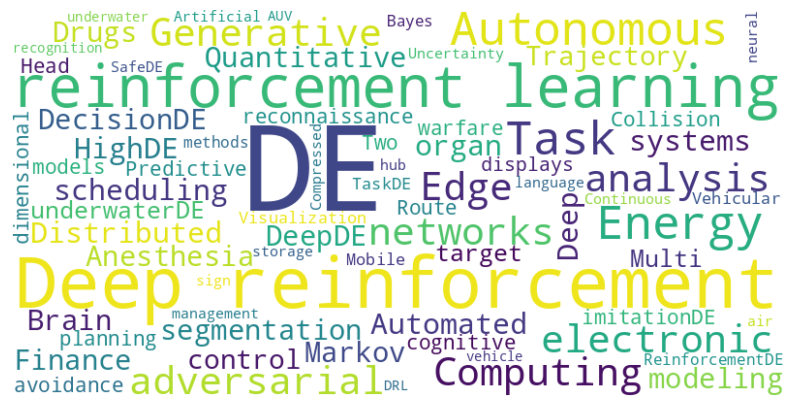

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The word cloud visualizes the frequency of keywords related to Deep Reinforcement Learning (DRL) in the analyzed text. Larger and bolder words, such as "DE", "reinforcement", "learning", "deep", and "energy", indicate higher frequency and prominence in the text. This visualization highlights the most common and significant terms in the research, reflecting the main themes and areas of focus within DRL literature.

##Bar chart displaying the top 10 words and their frequencies

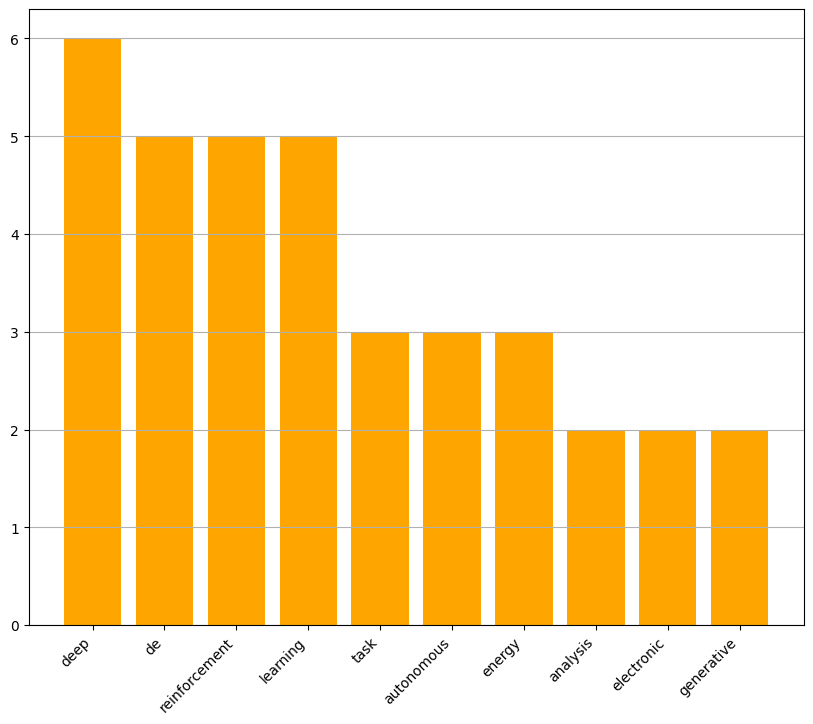

In [ ]:
plt.figure(figsize=(10,8))
top_words = freq_dist.most_common(10)  # Change 10 to desired number of top words
plt.bar(range(len(top_words)), [count for word, count in top_words], tick_label=[word for word, count in top_words],color='orange')
plt.xticks(rotation=45, ha='right')
plt.grid(True,axis='y')
plt.show()

The bar chart displays the frequency of the most common keywords related to Deep Reinforcement Learning (DRL) found in the analyzed text. The x-axis lists the keywords, while the y-axis shows their frequency of occurrence. "Deep" is the most frequent keyword, appearing 6 times, followed by "de", "reinforcement", and "learning" each appearing 5 times. Other notable keywords include "task", "autonomous", "energy", "analysis", "electronic", and "generative", reflecting key themes and areas of focus within DRL research.








**Tokenized the text into words, converted the words to lowercase, removed punctuation in it, numbers, and stopwords, and calculated the frequency distribution. Then, created a DataFrame from the frequency distribution and displayed it.**

In [ ]:
tokens = word_tokenize(text)
tokens = [word.lower() for word in tokens]
tokens = [word for word in tokens if word.isalpha()]
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]
filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]
freq_dist = FreqDist(tokens)
df = pd.DataFrame(freq_dist.most_common(), columns=['Word', 'Frequency'])
df

,Word,Frequency
0,deep,6
1,de,5
2,reinforcement,5
3,learning,5
4,task,3
...,...,...
66,recognition,1
67,underwater,1
68,vehicle,1
69,auv,1


Created co-occurrence pairs with weights, calculate their frequency distribution, and display the length of the resulting weighted co-occurrence pairs.

In [ ]:
co_occurrence_pairs = [(filtered_tokens[i],
filtered_tokens[j]) for i in range(len(filtered_tokens))
for j in range(i + 1, len(filtered_tokens))]
weighted_co_occurrences = nltk.FreqDist(co_occurrence_pairs)
weighted_co_occurrences

FreqDist({('deep', 'de'): 17, ('deep', 'reinforcement'): 16, ('deep', 'learning'): 16, ('deep', 'deep'): 15, ('deep', 'energy'): 15, ('reinforcement', 'learning'): 15, ('reinforcement', 'de'): 15, ('learning', 'de'): 15, ('reinforcement', 'deep'): 14, ('learning', 'deep'): 14, ...})

##Building the weighted co-occurrence network

In [ ]:
G = nx.Graph()
for (word1, word2), weight in weighted_co_occurrences.items():
  G.add_edge(word1, word2, weight=weight)

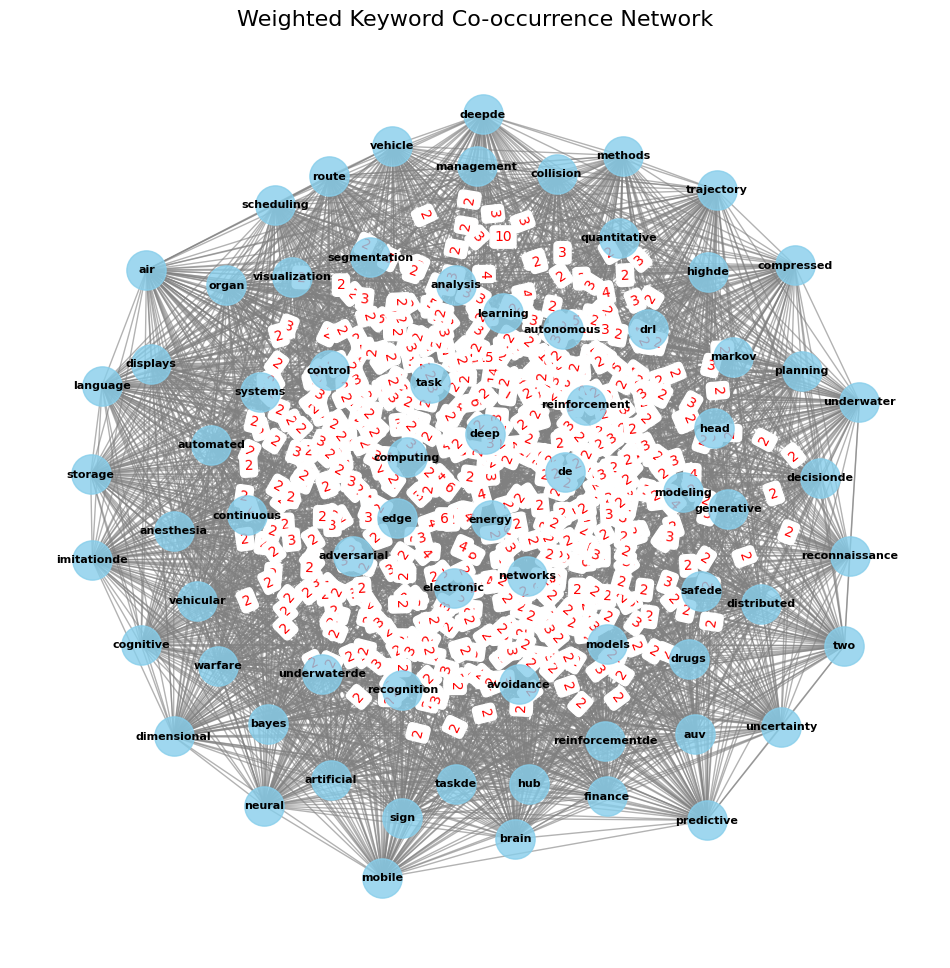

In [ ]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42, iterations=50)
edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]
max_weight = max(edge_weights)
edge_weights_normalized = [weight / max_weight * 5 for weight in edge_weights]
nx.draw_networkx_nodes(G, pos, node_size=800, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=1.0, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black', font_weight='bold')
edge_labels = {(word1, word2): f'{weight}' for (word1, word2, weight) in G.edges(data='weight') if weight > 1}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title("Weighted Keyword Co-occurrence Network", fontsize=16)
plt.axis('off')
plt.show()


The graph represents a weighted keyword co-occurrence network, where nodes represent keywords related to deep reinforcement learning research, and edges denote the co-occurrence of these keywords within the text. The size and weight of the connections indicate the frequency and strength of these associations, revealing the central themes and interconnected nature of key concepts in the field.

##Finding the node degree

In [ ]:
node_degrees = {node: G.degree(node) for node in G.nodes()}
node_degrees_sorted = sorted(node_degrees.items(), key=lambda x: x[1], reverse=True)
node_degrees_df = pd.DataFrame(node_degrees_sorted, columns=['Word', 'Degree'])
node_degrees_df

,Word,Degree
0,de,72
1,task,72
2,deep,72
3,reinforcement,72
4,learning,72
...,...,...
66,recognition,70
67,underwater,70
68,vehicle,70
69,auv,70


##Calculating the strength of the node

In [ ]:
node_strengths = {node: sum(G[node][neighbor]['weight'] for neighbor in G[node]) for node in G.nodes()}
node_strengths_sorted = sorted(node_strengths.items(), key=lambda x: x[1], reverse=True)
df_strength=pd.DataFrame(node_strengths_sorted, columns=['Word', 'Strength'])
df_strength

,Word,Strength
0,de,260
1,deep,229
2,energy,228
3,reinforcement,168
4,learning,168
...,...,...
66,artificial,77
67,neural,77
68,storage,77
69,vehicular,76


Scatter plot comparing degrees and strengths of nodes, with customization for marker style, color, and labels. Then, display the plot using matplotlib.

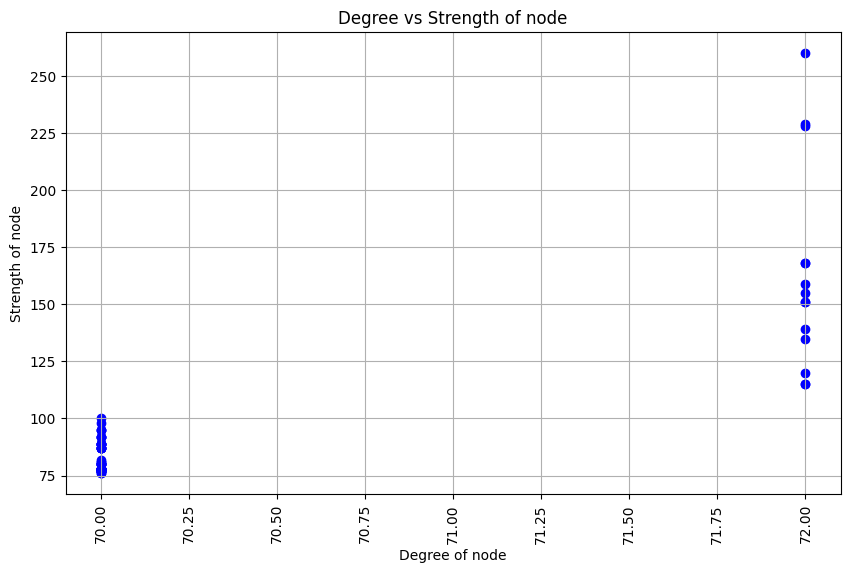

In [ ]:
node_names = [node for node, _ in node_strengths_sorted]
strengths = [strength for _, strength in node_strengths_sorted]
plt.figure(figsize=(10, 6))
plt.scatter(node_degrees_df['Degree'], df_strength['Strength'], marker='o', color='blue')
plt.title("Degree vs Strength of node")
plt.xlabel("Degree of node")
plt.ylabel("Strength of node")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

The graph illustrates the relationship between the degree of nodes and their strength in a network. Nodes with higher degrees generally have higher strengths, indicating that nodes with more connections tend to have stronger overall interactions within the network.

##Plotting node names and its strengths

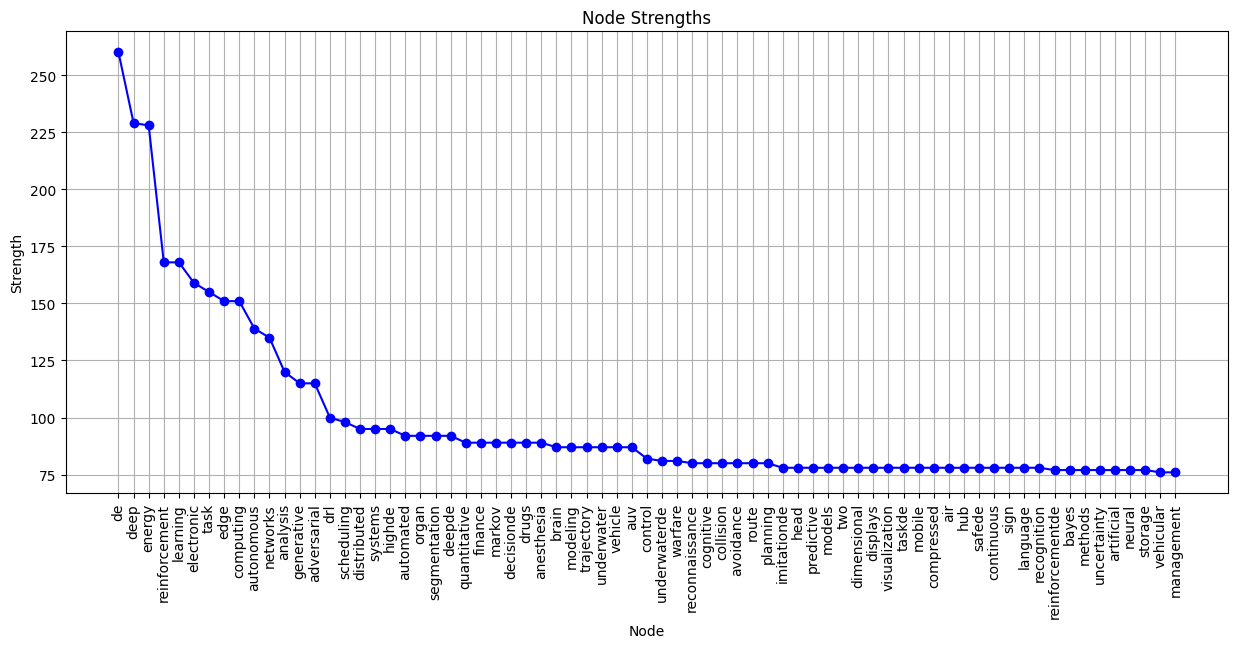

In [ ]:
node_names = [node for node, _ in node_strengths_sorted]
strengths = [strength for _, strength in node_strengths_sorted]
plt.figure(figsize=(15, 6))
plt.plot(node_names, strengths, marker='o', color='blue', linestyle='-')
plt.title("Node Strengths")
plt.xlabel("Node")
plt.ylabel("Strength")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


The graph shows the strengths of various nodes in a network, ranked from highest to lowest. The x-axis represents different nodes (keywords), while the y-axis shows their corresponding strengths. The most significant nodes, such as "de", "deep", and "energy," have the highest strengths, indicating their prominence and central role in the network. As we move to the right, the node strengths gradually decrease, showing a long tail of less influential nodes. This distribution highlights the key topics and their relative importance within the network.

##Resultant dataframe

In [ ]:
df=pd.merge(df,df_strength,on='Word',how='inner')
df_result=pd.merge(df,node_degrees_df,on='Word',how='inner')
df_result

,Word,Frequency,Strength,Degree
0,deep,6,229,72
1,de,5,260,72
2,reinforcement,5,168,72
3,learning,5,168,72
4,task,3,155,72
...,...,...,...,...
66,recognition,1,78,70
67,underwater,1,87,70
68,vehicle,1,87,70
69,auv,1,87,70


##Conclusion

Beginning with word frequency distribution plots, the frequency of words in the text is displayed through bar charts, aiding in identifying the most common terms. Word clouds present a visually appealing representation of word frequencies, offering a quick overview of prominent terms. Co-occurrence analysis delves deeper into word relationships, generating pairs with weights to uncover patterns of association. Additionally, scatter plots contrasting node strengths and degrees in a graph shed light on the interconnectedness and importance of nodes in the network.